# Проект: разработка стратегии взаимодействия с клиентами

**Заказчик:** Сеть фитнес-центров «Культурист-датасаентист»

В рамках проекта неободимо проанализировать клиенткую базку сети фитнес-центров, сформировать типичный портрет клиента и типичные характеристики, выявить причины оттока клиентов и спрогнозировать вероятность оттока

**Описание датасета** ``/datasets/gym_churn.csv``

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,silhouette_score
from sklearn.datasets import load_boston
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

## Изучение данных

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
display(data)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


приведем наименование всех полей к нижнему регистру

In [3]:
data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Датасет содержит 4000 записей, пропуски не обнаружены

Проверим датасет на наличие полных дубликатов

In [4]:
display(data.duplicated().sum())

0

полные дубликаты не выявлены

### Исследовательский анализ данных

#### Изучим датасет

In [5]:
display(data.describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Существенных разницы между средним значением и стандартным отклонением не выявлено. Отсутствующих значений нет, все параметры заполнены для каждого клиента.

In [6]:
display(data.groupby('churn').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Срежние показатели в группах оставшихся и отток:

Гендреное распределение в обеих группах прмерно одинаковое

Распределение по району проживания вблизи фитнес-центра оставшиеся преобладают 0,87 против 0,77 у группы отток

Участие в партнерских програма в группе оставшихся выше чем в группе отток, значения средних 0,53 и 0,35 соответвтенно

Участие в програма "приведи друга" в группе оставшихся также выше чем в группе отток, значения средних 0,35 и 0,18 соответвтенно

Контактный номер телефона в обеих группах оставляли достаточо охотно примерно - 90% клиентов

В группе оставшихся средний и медианный период в качестве клиента составляет 5,7 и 6 мес. соответственно. В группе отток среднее значение 1,7 мес., медианное значение1 мес., ст.отклонение 2,1

Средний возраст в группе оставшихся почти 30, в групе отток примерно 27

В среднем по грппе оставшихся сумма от других услуг фитнес центра составила 158,5, медиана 149,9. В группе отток средний показатель ниже и составляет 115,1, медиана 103,8.

По показателю срока до окончания действующего абонемента в разрезе групп данные сопоставимы. Так для группы оставшихся средний срок составляет 5,3, медиана 6 мес. В группе отток среднее знчаение 1,66, медиана 1 мес.
В группе оставшихся средний показатель посещения групповых занятий 0,46, в группе отток средний показатель 0,27.

Среднее и мдианное количество посещений в неделю в группе оставшихся клиентов 2, тогда как в группе отток эти показатели находятся на уровне 1,5. В обеих группа есть клиенты ни раза не посетившие фитнес-центр

в предыдущем месяце картина с частотой посещений по среднему и медианному показателю сопоставимая, так в группе оставшихся данные показатели находятся на уровне 2 и ст.отклонение 1, в группе отток среднее и медианное значение на уровне 1. В обеих группа также есть клиенты ни раза не посетившие фитнес-центр


Средний поазатель отока составляет 26,5%

для удобства дальнейшего анализа разделим дата сет на 2 группы: оставшиеся и группа отток

In [7]:
data_o = data.query('churn == 0') # группа остались
data_c = data.query('churn == 1') # группа отток
#display(data_o)
#display(data_c)

**Изучим клиентов сети фитнес-центров**

### Структура групп по булевым параметрам

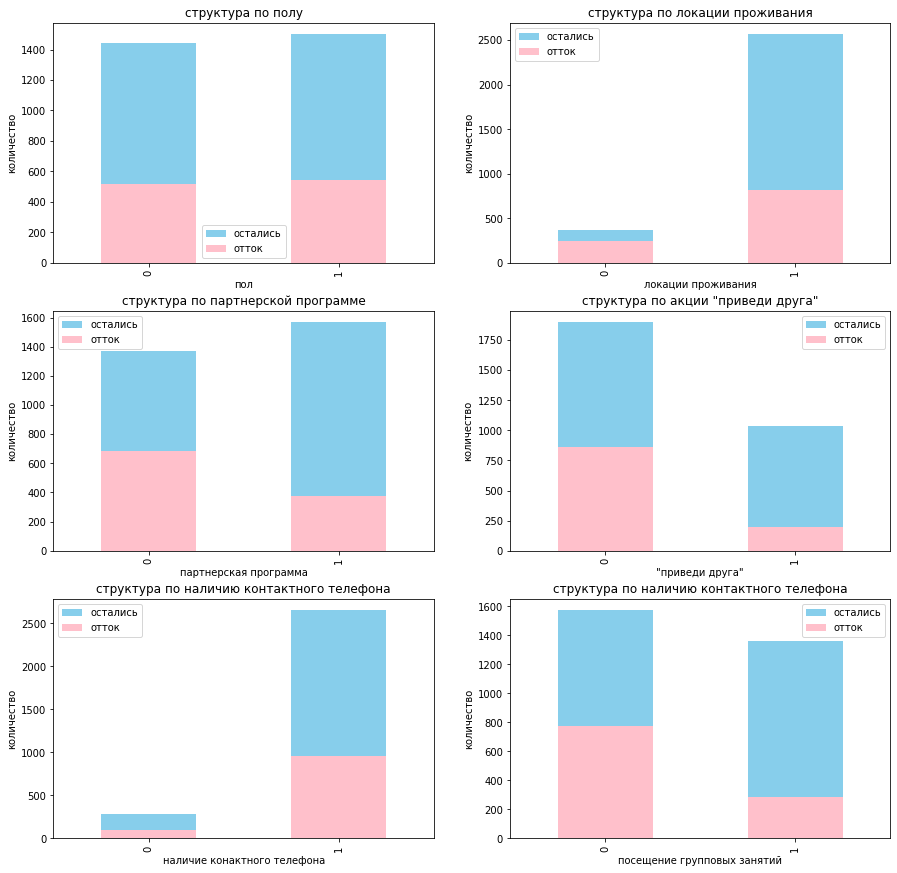

In [8]:
plt.subplot(3, 2, 1)
data_o.groupby('gender')['gender'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('gender')['gender'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('структура по полу')
plt.xlabel('пол')
plt.ylabel('количество')

plt.subplot(3, 2, 2)
data_o.groupby('near_location')['near_location'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались')
data_c.groupby('near_location')['near_location'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('структура по локации проживания')
plt.xlabel('локации проживания')
plt.ylabel('количество')

plt.subplot(3, 2, 3)
data_o.groupby('partner')['partner'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('partner')['partner'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('структура по партнерской программе')
plt.xlabel('партнерская программа')
plt.ylabel('количество')

plt.subplot(3, 2, 4)
data_o.groupby('promo_friends')['promo_friends'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('promo_friends')['promo_friends'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('структура по акции "приведи друга"')
plt.xlabel('"приведи друга"')
plt.ylabel('количество')

plt.subplot(3, 2, 5)
data_o.groupby('phone')['phone'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('phone')['phone'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('структура по наличию контактного телефона')
plt.xlabel('наличие конактного телефона')
plt.ylabel('количество')

plt.subplot(3, 2, 6)
data_o.groupby('group_visits')['group_visits'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('group_visits')['group_visits'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('структура по наличию контактного телефона')
plt.xlabel('посещение групповых занятий')
plt.ylabel('количество')


plt.show()

- Соотношение по половому составу примерно одинаково. Существенной разницы в преобладании какого-то одного пола не выявлено.  Доля оттока у мужчин (1) меньше чем у женщин (0).
- по локации проживания доля оставшихся выше чем доля оттока  если фитнес-зал расположен рядом с местом проживания. Видно, что приемущественно фитнес-центр посещают клиенты проживающие в этом же районе. 
- если клиент участвует в партнерской программе то доля оттока будет ниже чем у тех кто в этой программе не участвует. Количество клиентов участвующих в партнерской программе немного больше чем тех, кто в ней не участвуют
- если клиент участвует в акции "приведи друга" то доля оттока будет ниже чем у тех кто в этой программе не участвует. Количество клиентов участвующих в партнерской программе меньше чем тех, кто в ней не участвуют
- если клиент оставил свой контактный телефон, то доля оттока будет нижем, чем у клиентов которые этого не сделали, однако таких клиентов меньше чем тех, кто контактный номер телефона не оставляет.
- если клиент посещает групповые занятия то доля оттока будет ниже чем у тех кто занимается самостоятельно. Количество клиентов участвующих в групповых занятия меньше чем тех, кто занимается самостоятельно

### Стрктура групп по числовым параметрам

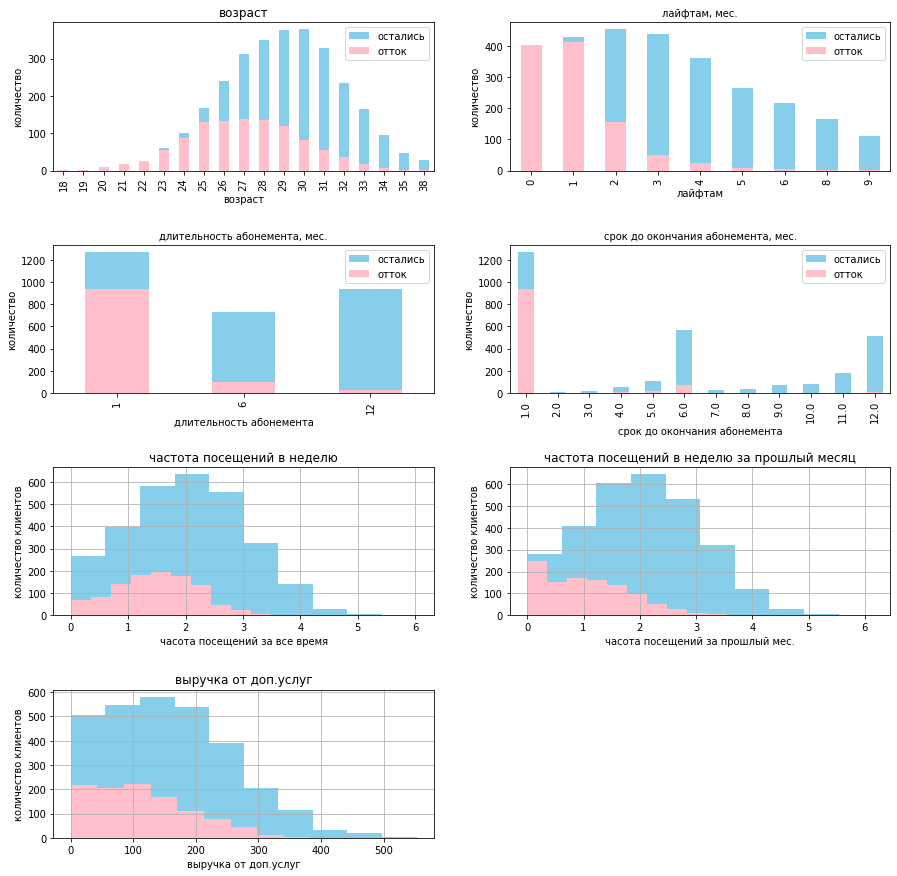

In [9]:
plt.figure(figsize=(30,30))
plt.subplot(4, 2, 1)
data_o.groupby('age')['age'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('age')['age'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('возраст')
plt.xlabel('возраст')
plt.ylabel('количество')

plt.subplot(4, 2, 2)
data_o.groupby('lifetime')['lifetime'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('lifetime')['lifetime'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('лайфтам, мес.', fontsize=10)
plt.xlabel('лайфтам')
plt.ylabel('количество', fontsize=10)

plt.subplot(4, 2, 3)
data_o.groupby('contract_period')['contract_period'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('contract_period')['contract_period'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('длительность абонемента, мес.', fontsize=10)
plt.xlabel('длительность абонемента')
plt.ylabel('количество', fontsize=10)


plt.subplot(4, 2, 4)
data_o.groupby('month_to_end_contract')['month_to_end_contract'].count().plot(kind = 'bar', color='skyblue', figsize=(15,15), label='остались') 
data_c.groupby('month_to_end_contract')['month_to_end_contract'].count().plot(kind = 'bar', color='pink', figsize=(15,15), label='отток')
plt.legend()
plt.title('срок до окончания абонемента, мес.', fontsize=10)
plt.xlabel('срок до окончания абонемента')
plt.ylabel('количество', fontsize=10)


plt.subplot(4, 2, 5)
data_o['avg_class_frequency_total'].hist(bins=10, color='skyblue', figsize=(15,15), label='остались')
data_c['avg_class_frequency_total'].hist(bins=10, color='pink', figsize=(15,15), label='отток')
plt.title('частота посещений в неделю')
plt.xlabel('часота посещений за все время', fontsize=10)
plt.ylabel('количество клиентов', fontsize=10)

plt.subplot(4, 2, 6)
data_o['avg_class_frequency_current_month'].hist(bins=10, color='skyblue', figsize=(15,15), label='остались')
data_c['avg_class_frequency_current_month'].hist(bins=10, color='pink', figsize=(15,15), label='отток')
plt.title('частота посещений в неделю за прошлый месяц')
plt.xlabel('часота посещений за прошлый мес.', fontsize=10)
plt.ylabel('количество клиентов', fontsize=10)

plt.subplot(4, 2, 7)
data_o['avg_additional_charges_total'].hist(bins=10, color='skyblue', figsize=(15,15), label='остались')
data_c['avg_additional_charges_total'].hist(bins=10, color='pink', figsize=(15,15), label='отток')
plt.title('выручка от доп.услуг')
plt.xlabel('выручка от доп.услуг', fontsize=10)
plt.ylabel('количество клиентов', fontsize=10)

plt.subplots_adjust(hspace=0.5)
plt.show()

- По возрасту клиентов видно, что чем старше тем меньше отток
- По графику длительности в качестве клиента (лайфтайм) видно, чем больше лайфтайм тем ниже отток
- У абонементов в 1 мес. отток наиболее выражен, тогда как с увеличением длительноти абонемента доля оттока значительнос мень, и для абонементов на 12 мес. отток проактически отсутствует
- схожая картина по сроку до окнчания абонемента - чем больше срок тем ниже отток, что обусловлено скорее всего изначельно сроком приобретенного абонемента
- по частоте посещений за все время с начала действия абонемента - чем часе кдиент посещает фитнес-цент тем реже он попадает в отток
- чем чаще в клиент посещает фитнес-центр в неделю за прошедший месяц, тем меньше отток. 
- выручка от дополнителных услуг в группе оставшихся значительно выше, чем в группе отток. Выручк группы отток за доп. услуг немногим более 100, тогда как в группе оставшихся примерно 150



27% клиентов в текущем месяце фактически прекратили пользоватлься услугами фитнес-центра

### Матрица корреляции признаков

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.00,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,-0.01,-0.00,0.01,0.01,0.01,0.00
near_location,0.01,1.00,-0.01,0.21,-0.02,0.15,0.15,0.06,0.04,0.14,0.07,0.04,0.06,-0.13
partner,-0.01,-0.01,1.00,0.45,0.01,0.31,0.02,0.05,0.02,0.29,0.06,0.02,0.05,-0.16
promo_friends,-0.01,0.21,0.45,1.00,0.00,0.24,0.12,0.05,0.04,0.24,0.07,0.03,0.05,-0.16
phone,-0.01,-0.02,0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.01,0.01,-0.00
contract_period,0.00,0.15,0.31,0.24,-0.01,1.00,0.17,0.14,0.11,0.97,0.17,0.10,0.16,-0.39
group_visits,0.02,0.15,0.02,0.12,-0.01,0.17,1.00,0.08,0.03,0.16,0.08,0.06,0.08,-0.18
age,0.01,0.06,0.05,0.05,-0.01,0.14,0.08,1.00,0.08,0.13,0.16,0.12,0.18,-0.40
avg_additional_charges_total,-0.01,0.04,0.02,0.04,0.01,0.11,0.03,0.08,1.00,0.11,0.08,0.04,0.08,-0.20
month_to_end_contract,-0.00,0.14,0.29,0.24,-0.01,0.97,0.16,0.13,0.11,1.00,0.16,0.09,0.15,-0.38


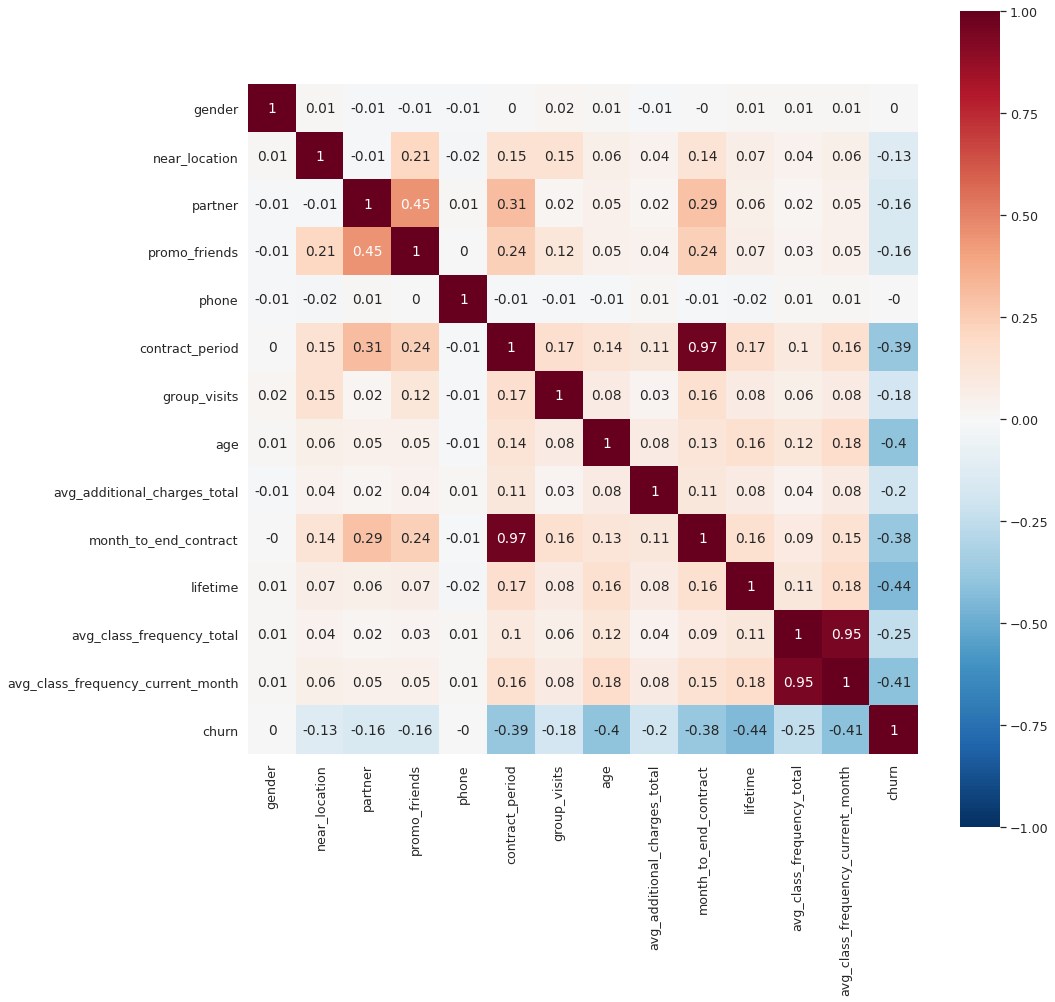

In [10]:
data_corr = data.corr().round(2)
display(data_corr)

sns.set(font_scale=1.15)
figsize = (15,15)


fig, ax = plt.subplots(figsize=figsize)

sns.heatmap(
    data_corr,        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, square=True,
    vmin=-1, vmax=1)
plt.show()

По оценке матрицы кореляции:
Пол клиента и телефон не коррелируют ни с одной переменной. 

слабая корреляция -0,13 с параметром ``'Near_Location'`` Если клиент живет рядом с фитнес-ентром вероятность оттока будет немного ниже

Корреляция от -0,16 до -0,25:
Если клиент имеет партнерскую прогрумму (``Partner``), привел друга (``Promo_friends``) или участвует в групповых занятиях (``Group_visits``), чем больше тратит на дополнительныые услуги фитнес-центтра (``'Avg_additional_charges_total'``), чем чаще посещал занятия (``'Avg_class_frequency_total'``), тем вероятность оттока бужет ниже.

Корреляция от -0,38 до -0,44
Чем более длительный абонемент (``'Contract_period'``) и срок до его окончания (``'Month_to_end_contract'``), возраст клиента (``Age``), лайфтам (``'Lifetime'``) клиентв, чем чаще клиент посещает занятия в предыдущем месяце (``'Avg_class_frequency_current_month'``), тем менее вероятен отток.


### Общие выводы по анализу клиентов

**Типичные клиенты фитнес-центра в группе оставшихся** 
это молодые люди в возрасте 30 лет, приемущественно проживающие в том же районе, где и расположен фитнес-центр, часто это клиенты участвующие в рамках акции "приведи друга", часто являются клиентами в среднем 4 мес., приобретают абонемент на 6 мес., примерно такой же период до окнчания действующего абонемента, в среднем 0,46 клиента посещают групповые занятия, как правило посещают фитннес-центр 2 раза в неделю как с начала дрействия абонемента так и по оценкам за предыдущий месяц, обычно на допоплнительные услуги тратят 158,44.

**Типичные клиенты фитнес-центра в группе отток**
это молодые люди в возрасте 27 лет, приемущественно проживающие в том же районе, где и расположен фитнес-центр, часто это клиенты участвующие в рамках акции "приведи друга", часто являются клиентами в среднем 1 мес., имеют в среднем абонемент на 1,7 мес., примерно такой же  период до окнчания действующего абонемента, в среднем 0,27 клиента посещают групповые занятия, как правило посещают фитннес-центр 1,5 раза в неделю с начала дрействия абонемента, но за предыдущий месяц частота посещений в среднем 1 раз в неделю, обычно на допоплнительные услуги тратят меньше чем группа оставшихся, в среднем сумма 115,1.
    
По оценке матрицы кореляции:
**слабая корреляция -0,1** с параметром ``'Near_Location'`` Если клиент живет рядом с фитнес-ентром вероятность оттока будет немного ниже

**Корреляция -0,2:**
Если клиент имеет партнерскую прогрумму (``Partner``), привел друга (``Promo_friends``) или участвует в групповых занятиях (``Group_visits``), чем больше тратит на дополнительныые услуги фитнес-центтра (``'Avg_additional_charges_total'``), чем чаще посещал занятия (``'Avg_class_frequency_total'``), тем вероятность оттока бужет ниже.

**Корреляция -0,4**
Чем более длительный абонемент (``'Contract_period'``) и срок до его окончания (``'Month_to_end_contract'``), возраст клиента (``Age``), лайфтам (``'Lifetime'``) клиентв, чем чаще клиент посещает занятия в предыдущем месяце (``'Avg_class_frequency_current_month'``), тем менее вероятен отток.

## Модель прогнозирования оттока клиентов

In [11]:
# уберём строки с пустыми значениями из набора данных
data.dropna(inplace=True)

# сохраним датафрейм с учётом преобразования признаков
data = pd.get_dummies(data)

# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns=['churn'])
y = data['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [12]:

# Создание конвейера для масштабирования данных и логистической регрессии

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Определение сетки параметров для поиска
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'saga']
    
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Выполнение поиска
grid_search.fit(X_train, y_train)

# Лучшие найденные параметры
print("Лучшие параметры для LogisticRegression:", grid_search.best_params_)
print("Лучшая оценка точности:", grid_search.best_score_)

Лучшие параметры для LogisticRegression: {'logreg__C': 100, 'logreg__solver': 'liblinear'}
Лучшая оценка точности: 0.93


In [13]:
# Определение сетки параметров для поиска
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Количество комбинаций параметров для проверки
    cv=5,       # Количество фолдов для кросс-валидации
    verbose=2,
    n_jobs=-1,  # Использовать все доступные ядра процессора
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Выполнение поиска
random_search.fit(X_train, y_train)

# Лучшие найденные параметры
print("Лучшие параметры для RandomForestRegressor:", random_search.best_params_)
print("Лучший MSE:", -random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; tot

In [14]:
# задайте список моделей
models = [
    LogisticRegression(penalty='l2', C=100, max_iter=1000, multi_class='ovr',solver='liblinear', random_state=0),
    RandomForestClassifier(n_estimators = 400,max_depth=50, min_samples_split=5, min_samples_leaf=2, max_features = 'auto' ,class_weight='balanced', criterion='gini',  random_state = 0),
]


# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
            'Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f} F1: {:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score (y_test, y_pred),
            recall_score (y_test, y_pred),
            f1_score(y_test, y_pred) 
        )
    )

            

# напишите цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train_st,
        y_train=y_train,
        X_test=X_test_st,
        y_test=y_test
    )

LogisticRegression(C=100, max_iter=1000, multi_class='ovr', random_state=0,
                   solver='liblinear')
Accuracy: 0.92 Precision: 0.85 Recall: 0.83 F1: 0.84
RandomForestClassifier(class_weight='balanced', max_depth=50,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, random_state=0)
Accuracy: 0.92 Precision: 0.82 Recall: 0.86 F1: 0.84


Лучше всего результаты показала модель ``LogisticRegression``
Доля правильных ответов (Accuracy) одинаковые 0,92, 
точность (Precision) выше у ``LogisticRegression`` 0,85 против 0,82 у ``RandomForestRegressor``
полнота (Recall) вышу у ``RandomForestRegressor`` 0,86, тогда как у 0,83 ``LogisticRegression``
F1-мера  у обеих моделей однинаковые.
Определим параметр Precision как более предпотительный, в таком случае модель будет ``LogisticRegression``

## Кластеризация клиентов

**Стандаритзация данных и график кластеной модели**

In [15]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [16]:
linked = linkage(X_sc, method = 'ward')
display(linked)

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

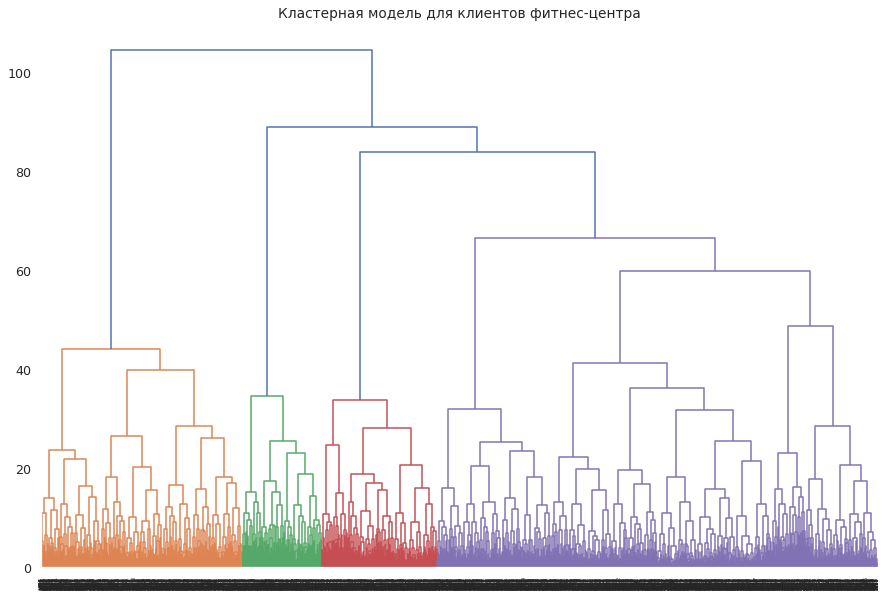

In [17]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластерная модель для клиентов фитнес-центра')
plt.show() 

Судя по полученному графику можно выделить 5 кластеров, т.к. горизонтальный линии (расстояния между кластерами) примерно одинаковое

## Средние значения кластеров

In [18]:
# стандартизируем данные
#sc = StandardScaler()
#x_sc = sc.fit_transform(data)

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
    # прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
display(data.groupby('cluster_km').mean().T)

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Кластер 0 - средний возраст почти 30 лет, почти все клиенты - 95,9% проживают в районе расположения фитнес-центра, 78,3% учестники партнерской программы, более половины (57%) участники акции "приведи друга" и групповых занятий (54,3%), все оставили контактный номер телефона, длительность абонемента почти 11 мес., срок до окончания абонемента почти 10 мес., лайфтайм 4,7 мес., частота посещний фитнес-центра за весь период и за прошлый месяц 2 раза в неделю,одна из самых выоких выручка за доп.услуги 160,8, средний отток 2,8%

Кластер 1 - средний возраст - 29,3 лет,большинство клиентов - 86,2% проживают в районе расположения фитнес-центра, 47% учестники партнерской программы, почти треть (30,6%) участники акции "приведи друга", в групповых занятиях участвует 42,6%, ни один не оставил контактный номер телефона, длительность абонемента почти 5 мес., срок до окончания абонемента почти 4,5 мес., лайфтайм 3,9 мес., частота посещний фитнес-центра за весь период и за прошлый месяц 1,8 и 1,7раза в неделю соответствнно, выручка за доп.услуги 143,96, средний отток 26,8% 

Кластер 2 - средний возраст - 28,5 лет,никто из клиентов не проживает в районе расположения фитнес-центра, 46,3% учестники партнерской программы, всего 7,9% участники акции "приведи друга", в групповых занятиях только 21,6%, все клиенты оставили контактный номер телефона, длительность абонемента 2,3 мес., срок до окончания абонемента почти 2,2 мес., лайфтайм 2,8 мес., частота посещний фитнес-центра за весь период и за прошлый месяц 1,7 и 1,5 раза в неделю соответствнно, выручка за доп.услуги 135,5, средний отток 44,4% 

Кластер 3 - средний возраст - 28,2 лет,почти все клиенты - 97,6% проживают в районе расположения фитнес-центра, 35% учестники партнерской программы, 24% участники акции "приведи друга", в групповых занятиях только 34,1%, все клиенты оставили контактный номер телефона, длительность абонемента 1,9 мес., срок до окончания абонемента почти 1,9 мес., лайфтайм 2,4 мес., частота посещний фитнес-центра за весь период и за прошлый месяц 1,2 и 1,1 раза в неделю соответствнно, выручка за доп.услуги самая низкая 131,6, средний отток 51,4% 

Кластер 4 - средний возраст самый высокий - 30,1 лет,никто из клиентов не проживает в районе расположения фитнес-центра, 35,7% учестники партнерской программы, 23% участники акции "приведи друга", в групповых занятиях 47,4%, большинство клиентов оставили контактный номер телефона, длительность абонемента 2,7 мес., срок до окончания абонемента почти 2,5 мес., лайфтайм 4,9 мес., частота посещний фитнес-центра за весь период и за прошлый месяц 2,9 раза в неделю, выручка за доп.услуги самая высокая 161,7, средний отток 6,8% 

Кластер 0 - ни одни клиет в этом кластере не проживают в в одном районе с фитне-центром, самый низкий уровень участия в партнерской программе, групповых занятиях, значительный отток - 45%

Кластер 1 - самый большой период действия абонемента - более 10 мес. и срок до окончания действия абонемента (более 9 мес.) и участие в партнерской програме, больше половины участники акции "приведи друга",более половины псещают групповые заняия

Кластер 2 - самое высокий пказатель оттока, при этом самый низкий показатель по суммарной выручке от доп.услуг, по времени в качестве клиента, длтельность абонемента и срока до окончания дейтвия абонемента, по частоте посещений как в прошедшем месяце, так и за все время, самый низкий средний возраст

Кластер 3 - самый низкий показатель оттока. Самый "старший" кластер с наиболее длительным периодом в качестве клиента. 45% просещают групповые занятия, почти 5 мес. в качестве клинтов фитне-центра, более 2 посещений в неделю, близкое к максимальному среднему значению выручка за доп.услуги

Кластер 4 - самая высокая выручка от доп.услуг, более 8 мес. абонемент и срок до окончания действия абонемента, более 4 мес. в 
качестве клиента, значительное количество участникв в партнерской програме, больше половины участники акции "приведи друга", более половины псещают групповые занятия, при это самы низкий показатель по частоте посещения фитес-центра


## Распределения признаков

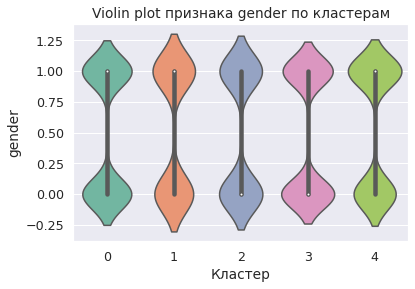

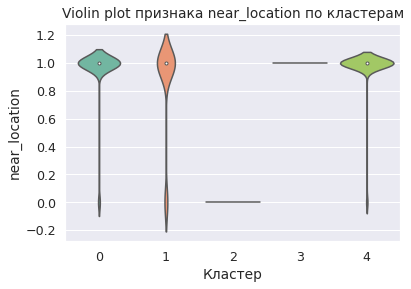

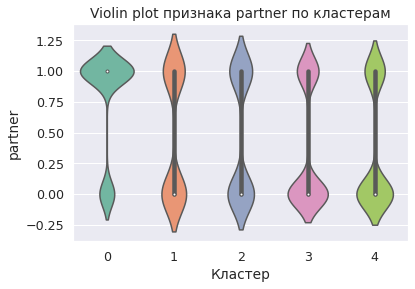

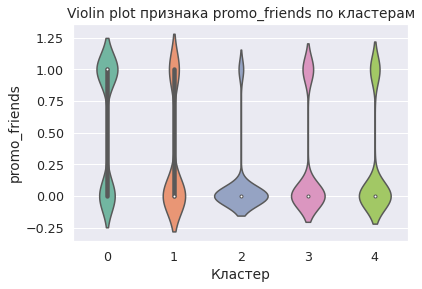

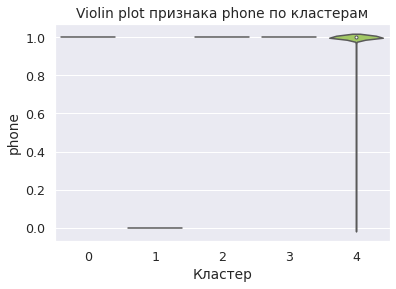

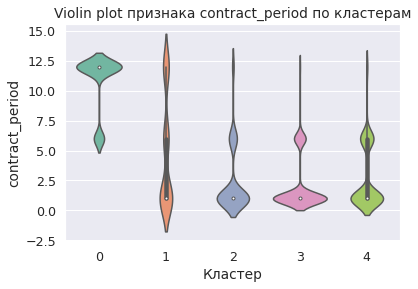

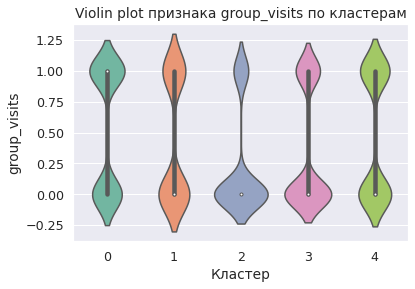

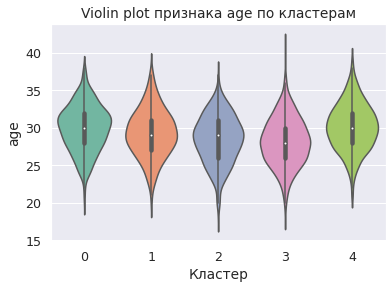

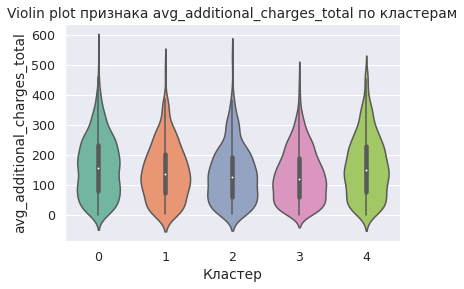

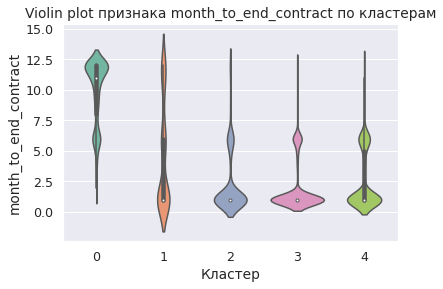

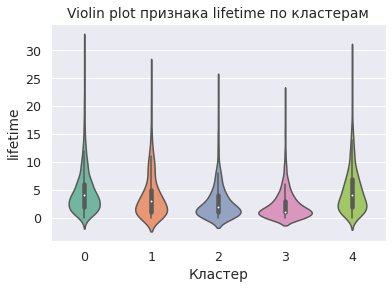

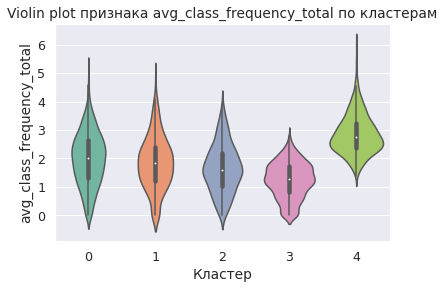

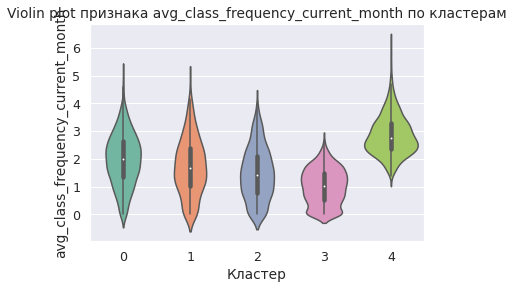

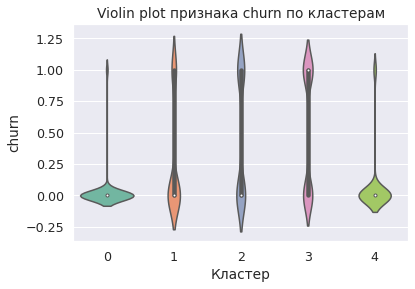

In [19]:

for i, feature in enumerate(data.columns[:-1]):
    sns.violinplot(data=data, x='cluster_km', y=feature, palette='Set2')
    plt.title(f'Violin plot признака {feature} по кластерам')
    plt.xlabel('Кластер')
    plt.ylabel(feature)
    plt.show()

**Распределение признаков о кластерам:**
- распределение по полу - распределение примерно одинаковой, существенных отклонений нет
- по месту роживания: кластер 2 все клиенты проживают в другом районе, его полная противоположность кластер 3 где клиенту приемущественно проживают в раойне расположения фитнес-центра, по кластерам 0,1,4 большинсво клиентов проживают в одном районе с фитнес-центром
- по участию в партнерских программах в лидерах кластер 0, в кластерах 3,4 большинство клиентов в такой программе не участвут, в кластерах 1,2 расределение примерно одинаковое
- по участию в акции "приведи друга" кластеры 2,3,4 реже всего участвуют в этой программе, в кластере 1 также превалирует самостоятельные занятия но с меньшим приемуществом, в кластере 0 распределение примерно одинаковое
- практически все клиенты в кластерах 0,2,3,4 оставляют свои контактне номера тилефонов, кластер 1 напротив ни один из клиентов телефон не оставил
- наибольший срок действия абонемента в кластере 0, в остальных кластерах средний срок до окнчания абонемента на уровне примерно 2 мес.
- посещение групповых занятий в кластерах 0,1 примерно одинаковое, кластеры 2,3,4 примемущественно занимаются самостоятельно
- самый "старший" кластер 4, самый "молодой" кластер 3
- наименьшая выручка от доп.услуг в кластере 3, чуть больше дает кластер 2, кластеры 0,1,4 находятся примерно на одном уровне
- срок до окончания действия абонемента наибольший у кластера 0, у остальных кластеров сроки в районе 2 мес
- минимальный лайфтайм в ластере 3, немногим больше в кластере 2. В кластерах 0,4, средний показатель ближе к 5 мес., немногим меньше среднее значение в кластере 1
- частота посещейний за все время действия абонемента минимальное в районе 1,5 раза в неделю у кластера 3, далее по частоте посещений идет кластеры 2,1 - примерно 1,5-1,8 раза в неделю,  примерно 2 посещения у кластера 0, в кластере 4 клиенты посещают фитнес-центр чаще всего - почти 3 раза в неделю
- по частоте посещений за прошедший месяц каритна схожая и почти без изменений, однако в кластере 3 наблюдается снижение среднего показателя до примерно 1
- минимальный отток киентов в кластере 0 и 4, в кластерах 1,2 отток немногим больше. Максимальный отток в кластере 3

### Отток по кластерам

In [20]:
display((data.groupby('cluster_km')['churn'].sum() / data['churn'].sum()).sort_values(ascending=False))


cluster_km
3    0.611687
2    0.211122
1    0.097078
4    0.053723
0    0.026390
Name: churn, dtype: float64

Расчет среднего значения отток по кластерам поддстверждает, что наибольшая доля оттока в кластере 2 - 74,4%. Менее 1% отток в кластерах 1 и 3 с долей оттока 0,5  и 0,3% соответственно, в кластере 4 отток также незначителньый - 1,6%. Кластер 0 показывает отток 23,1%

## Выводы и рекомендации

Проведен исследовательский анализ данных клиентов сети фитнес-центров. Всего вы выборке 4000 запискей о клиентах с 14 параметрами.

Для исследования выборка разеделан на группы: оставшиеся и отток

Типичные клиенты фитнес-центра в группе оставшихся это молодые люди в возрасте 30 лет, приемущественно проживающие в том же районе, где и расположен фитнес-центр, часто это клиенты участвующие в рамках акции "приведи друга", часто являются клиентами в среднем 4 мес., приобретают абонемент на 6 мес., примерно такой же период до окнчания действующего абонемента, в среднем 0,46 клиента посещают групповые занятия, как правило посещают фитннес-центр 2 раза в неделю как с начала дрействия абонемента так и по оценкам за предыдущий месяц, обычно на допоплнительные услуги тратят 158,44.

Типичные клиенты фитнес-центра в группе отток это молодые люди в возрасте 27 лет, приемущественно проживающие в том же районе, где и расположен фитнес-центр, часто это клиенты участвующие в рамках акции "приведи друга", часто являются клиентами в среднем 1 мес., имеют в среднем абонемент на 1,7 мес., примерно такой же период до окнчания действующего абонемента, в среднем 0,27 клиента посещают групповые занятия, как правило посещают фитннес-центр 1,5 раза в неделю с начала дрействия абонемента, но за предыдущий месяц частота посещений в среднем 1 раз в неделю, обычно на допоплнительные услуги тратят меньше чем группа оставшихся, в среднем сумма 115,1.

По оценке матрицы кореляции:
Пол клиента и телефон не коррелируют ни с одной переменной. 

слабая корреляция -0,13 с параметром ``'Near_Location'`` Если клиент живет рядом с фитнес-ентром вероятность оттока будет немного ниже

Корреляция от -0,16 до -0,25:
Если клиент имеет партнерскую прогрумму (``Partner``), привел друга (``Promo_friends``) или участвует в групповых занятиях (``Group_visits``), чем больше тратит на дополнительныые услуги фитнес-центтра (``'Avg_additional_charges_total'``), чем чаще посещал занятия (``'Avg_class_frequency_total'``), тем вероятность оттока бужет ниже.

Корреляция от -0,38 до -0,44
Чем более длительный абонемент (``'Contract_period'``) и срок до его окончания (``'Month_to_end_contract'``), возраст клиента (``Age``), лайфтам (``'Lifetime'``) клиентв, чем чаще клиент посещает занятия в предыдущем месяце (``'Avg_class_frequency_current_month'``), тем менее вероятен отток.

LogisticRegression в качестве модели прогнозирования оттока клиентов показала себя наилучшим образом.

В рамках кластерного анализа наихудшим с точки зрения доли оттока показал кластер 3. - самое высокий пказатель оттока, при этом самый низкий показатель по суммарной выручке от доп.услуг, по времени в качестве клиента, длительность абонемента и срока до окончания дейтвия абонемента, по частоте посещений как в прошедшем месяце, так и за все время, самый низкий средний возраст

Самые лучшие с этой точки зрения кластеры 0 и 4 Характерными особенностями для кластеров является проживаниев районе расположения фитнес-центра, высокая частота посещений фитнес-центра , и срок в качетве клиента, посещение групповых занятий, средний возраст примерно 30 лет.

Для снижения оттока стоит рассмотреть:
- стимулирование клиентов на приобретение абонементов большей длительности, частоте посещений фитнес-центра на пример путем скидок на приобретение длительных абонементов на 12+ мес., или начисления доп.бонусов  
- на посещение групповых занятий, стимулировать участие в групповых занятиях, партнерских программах и акциях типа "приведи друга". Занятия в коллетиве, с другом положительно сказывается на мотивации продолжать занятия и оставаться клиентов фитнес-центра, формируя долгосрочную привычку 
- привелечение старшего поколения
